# Social Anxiety Detection - Machine Learning Notebook

***

## Contents

__1. Introduction <br/>__
1.1. Overview <br/>
1.2. Description of the ML Experiments <br/>
__2. Import Packages <br/>__
__3. Import & Combine Data <br/>__
3.1. Import & Combine Experiment (1) Data <br/>
3.2. Import & Combine Experiment (2) Data <br/>
3.3. Import & Combine Experiment (3) Data <br/>
__4. Data Visualisation <br/>__
__5. General Train and Test <br/>__
5.1. Experiment (1) <br/>
5.2. Experiment (2) <br/>
5.3. Experiment (3) <br/>
__6. Further Evaluation Using Cross Validation <br/>__
6.1. Experiment (1) <br/>
6.2. Experiment (2) <br/>
6.3. Experiment (3) <br/>
__7. Direct Comparison Between Models <br/>__
7.1. Experiment (1) <br/>
7.2. Experiment (2) <br/>
7.3. Experiment (3) <br/>
__8. Exploring Feature Combinations <br/>__
8.1. Experiment (1) <br/>
8.2. Experiment (2) <br/>
8.4. Experiment (3) <br/>

***

## 1. Introduction

### 1.1. Overview

This notebook consists of three Machine Learning (ML) experiments using physiological data to detect social anxiety in young people. The physiological data that was observed includes Heart Rate (HR) data, Skin Temperature (ST) data and Electrodermal Activity (EDA) data. Each participant's data has been preprocessed using a data preprocessing notebook called _'Data_Preprocessing_Notebook.ipynb'_ , the preprocessing notebook also describes the nature of the data in further depth.

The [Scikit-Learn](https://scikit-learn.org/stable/) module was also used since it is [one of the most comprehensive open-source ML Python modules](https://journals.sagepub.com/doi/10.3102/1076998619832248) that contains a wide range of functionalities for supervised learning.

The following classification algorithms are explored in this notebook, Support Vector Machines (SVM), Random Forest, Decision Tree and K-Nearest Neighbours (KNN). You can find out more information about them [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).


### 1.2. Description of the ML Experiments

__Experiment (1)__ investigates whether models can be trained to detect baseline and socially anxious states. The data is either labelled '0' during the baseline period and '1' during the anxiety period (during anticipation and reactive anxiety).

__Experiment (2)__ investigates whether models can be trained to differentiate between baseline, anticipation anxiety and reactive anxiety states  The data is labelled in three ways, '0' during the baseline period, '1' during the anticipation anxiety period and '2' during the reactive anxiety period.

__Experiment (3)__ investigates whether models can be trained to differentiate between social anxiety experienced by individuals with differing social anxiety severity. The data was segregated based on scores reported using the self-reported version of Liebowitz Social Anxiety Scale (LSAS-SR), the data was is either labelled as '0' for individuals in anxiety category 1 (LSAS-SR:50-64) or labelled as '1' for individuals in anxiety category 2 (LSAS-SR:65-80).

***

## 2. Import Packages

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
from decimal import Decimal
import time
%matplotlib inline

#Scikit-Learn packages for ML
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing

## 3.Import & Combine Data 

### 3.1. Import & Combine Experiment (1) Data

The data from the partcipants are combined into a master dataset, one for each of the three experiments. Below the data for __experiment (1)__ is combined.

In [11]:
df1 = pd.read_csv("../data_preprocessing/1/experiment_1.csv")
df2 = pd.read_csv("../data_preprocessing/2/experiment_1.csv")
df3 = pd.read_csv("../data_preprocessing/3/experiment_1.csv")
df4 = pd.read_csv("../data_preprocessing/4/experiment_1.csv")
df5 = pd.read_csv("../data_preprocessing/5/experiment_1.csv")
df6 = pd.read_csv("../data_preprocessing/6/experiment_1.csv")
df7 = pd.read_csv("../data_preprocessing/7/experiment_1.csv")
df8 = pd.read_csv("../data_preprocessing/8/experiment_1.csv")
df9 = pd.read_csv("../data_preprocessing/9/experiment_1.csv")
df10 = pd.read_csv("../data_preprocessing/10/experiment_1.csv")
df11 = pd.read_csv("../data_preprocessing/11/experiment_1.csv")
df12 = pd.read_csv("../data_preprocessing/12/experiment_1.csv")


masterdf1 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0, join='outer', ignore_index=False)
masterdf1 = masterdf1.drop('Unnamed: 0', axis =1)
masterdf1 = masterdf1.reset_index(drop=True)

masterdf1.to_csv("master_experiment_1.csv")

experiment1 = masterdf1.copy()
experiment1.columns = ['HR','ST', 'EDA', 'Labels']
print('Some descriptive statistics extracted from the combined experiment (1) dataset...')
display(experiment1.describe())

Some descriptive statistics extracted from the combined experiment (1) dataset...


HR            ST           EDA        Labels
count  61012.000000  61012.000000  61012.000000  61012.000000
mean      87.726116     31.358579      0.358737      0.613453
std       14.538783      1.611184      0.270503      0.486962
min       52.043333     28.858000      0.000229      0.000000
25%       79.732222     29.957667      0.118689      0.000000
50%       88.650000     31.484667      0.322676      1.000000
75%       94.920278     32.891333      0.566445      1.000000
max      147.584444     34.566000      1.000244      1.000000

### 3.2. Import & Combine Experiment (2) Data

Below the data for __experiment (2)__ is combined. 

In [9]:
df1 = pd.read_csv("../data_preprocessing/1/experiment_2.csv")
df2 = pd.read_csv("../data_preprocessing/2/experiment_2.csv")
df3 = pd.read_csv("../data_preprocessing/3/experiment_2.csv")
df4 = pd.read_csv("../data_preprocessing/4/experiment_2.csv")
df5 = pd.read_csv("../data_preprocessing/5/experiment_2.csv")
df6 = pd.read_csv("../data_preprocessing/6/experiment_2.csv")
df7 = pd.read_csv("../data_preprocessing/7/experiment_2.csv")
df8 = pd.read_csv("../data_preprocessing/8/experiment_2.csv")
df9 = pd.read_csv("../data_preprocessing/9/experiment_2.csv")
df10 = pd.read_csv("../data_preprocessing/10/experiment_2.csv")
df11 = pd.read_csv("../data_preprocessing/11/experiment_2.csv")
df12 = pd.read_csv("../data_preprocessing/12/experiment_2.csv")

masterdf2 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0, join='outer', ignore_index=False)
masterdf2 = masterdf2.drop('Unnamed: 0', axis =1)
masterdf2 = masterdf2.reset_index(drop=True)

masterdf2.to_csv("master_experiment_2.csv")

experiment2 = masterdf2.copy()
experiment2.columns = ['HR','ST', 'EDA', 'Labels']
print('Some descriptive statistics extracted from the combined experiment (2) dataset...')
display(experiment2.describe())

Some descriptive statistics extracted from the combined experiment (2) dataset...


HR            ST           EDA        Labels
count  60710.000000  60710.000000  60710.000000  60710.000000
mean      87.731436     31.359380      0.359097      0.833932
std       14.561927      1.613748      0.270567      0.757201
min       52.043333     28.858000      0.000229      0.000000
25%       79.673333     29.954000      0.119272      0.000000
50%       88.653333     31.488667      0.322814      1.000000
75%       94.959722     32.896667      0.566772      1.000000
max      147.584444     34.566000      1.000244      2.000000

### 3.3. Import & Combine Experiment (3) Data

Below the data for __experiment (3)__ is combined.

In [12]:
df1 = pd.read_csv("../data_preprocessing/1/experiment_3.csv")
df3 = pd.read_csv("../data_preprocessing/3/experiment_3.csv")
df4 = pd.read_csv("../data_preprocessing/4/experiment_3.csv")
df5 = pd.read_csv("../data_preprocessing/5/experiment_3.csv")
df6 = pd.read_csv("../data_preprocessing/6/experiment_3.csv")
df7 = pd.read_csv("../data_preprocessing/7/experiment_3.csv")
df9 = pd.read_csv("../data_preprocessing/9/experiment_3.csv")
df10 = pd.read_csv("../data_preprocessing/10/experiment_3.csv")
df11 = pd.read_csv("../data_preprocessing/11/experiment_3.csv")
df12 = pd.read_csv("../data_preprocessing/12/experiment_3.csv")

masterdf3 = pd.concat([df1,df3,df4,df5,df6,df7,df9,df10,df11,df12], axis=0, join='outer', ignore_index=False)
masterdf3 = masterdf3.drop('Unnamed: 0', axis =1)
masterdf3 = masterdf3.reset_index(drop=True)

masterdf3.to_csv("master_experiment_3.csv")

experiment3 = masterdf3.copy()
experiment3.columns = ['HR','ST', 'EDA', 'Labels']
print('Some descriptive statistics extracted from the combined experiment (3) dataset...')
display(experiment3.describe())

Some descriptive statistics extracted from the combined experiment (3) dataset...


HR            ST           EDA        Labels
count  20002.000000  20002.000000  20002.000000  20002.000000
mean      86.856100     31.431672      0.449541      0.500050
std       14.479491      1.679516      0.259400      0.500012
min       52.043333     28.858000      0.001311      0.000000
25%       77.835833     29.490000      0.232071      0.000000
50%       88.115000     31.590000      0.445365      1.000000
75%       94.088333     33.000667      0.651391      1.000000
max      147.408889     34.566000      1.000012      1.000000

## 4.Data Visualisation 

Below are correlation matrices extracted from the combined datasets for each experiment.

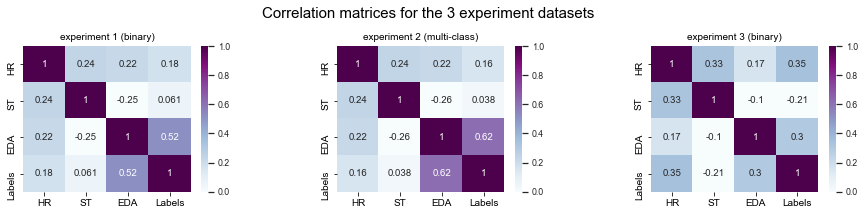

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,3))
fig.suptitle('Correlation matrices for the 3 experiment datasets', fontsize = 15)
labeldata = ['HR', 'ST', 'EDA','Labels']

sns.set(font_scale=0.8)
ax1.set_title("experiment 1 (binary)", fontsize = 10)
sns.heatmap(masterdf1.corr(method = 'pearson'), vmin=0, vmax=1, annot=True, cmap="BuPu", ax=ax1, yticklabels = labeldata, xticklabels = labeldata)
ax2.set_title("experiment 2 (multi-class)", fontsize =10)
sns.heatmap(masterdf2.corr(method = 'pearson'), vmin=0, vmax=1, annot=True, cmap="BuPu", ax=ax2, yticklabels = labeldata, xticklabels = labeldata)
ax3.set_title("experiment 3 (binary)", fontsize = 10)
sns.heatmap(masterdf3.corr(method = 'pearson'), vmin=0, vmax=1, annot=True, cmap="BuPu", ax=ax3, yticklabels = labeldata, xticklabels = labeldata)
plt.subplots_adjust(hspace=0.6,wspace=0.5, top=0.8)
plt.show()

Below the visualisation of data used in __experiment (1) & (2)__ against the labels.

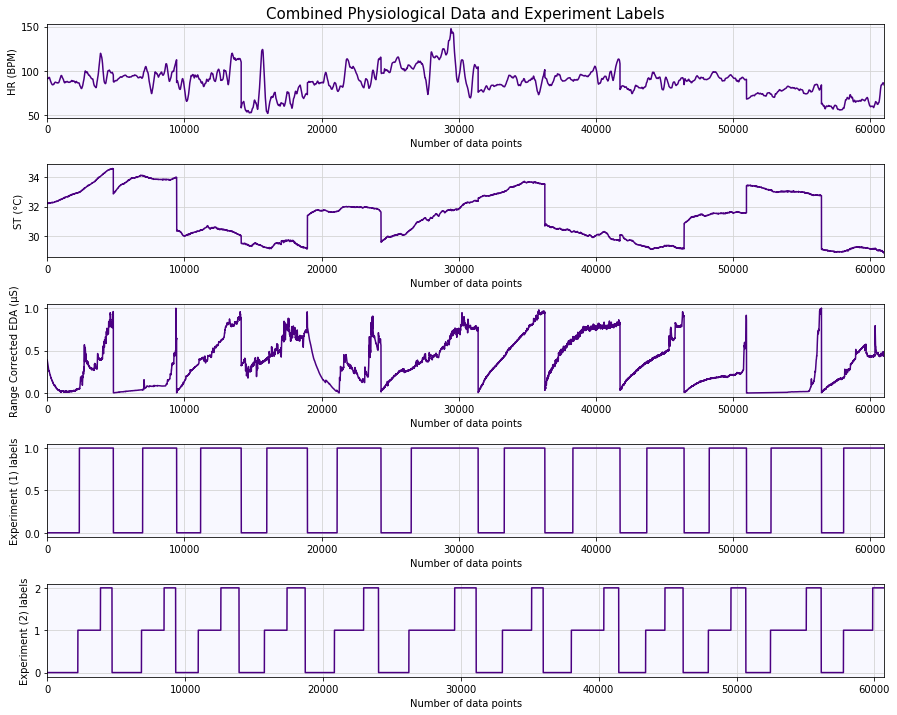

In [14]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, frameon = True)

ax1.set_title('Combined Physiological Data and Experiment Labels', fontsize = 15)

masterdf1['0'].plot(ax=ax1, legend=False, color = 'indigo')
ax1.yaxis.set_label_text("HR (BPM)")
ax1.xaxis.set_label_text("Number of data points")
ax1.set_facecolor(color = 'ghostwhite')
ax1.grid(which='both', color ='lightgrey')

masterdf1['1'].plot(ax=ax2, legend=False, color = 'indigo')
ax2.yaxis.set_label_text("ST (°C)")
ax2.xaxis.set_label_text("Number of data points")
ax2.set_facecolor(color = 'ghostwhite')
ax2.grid(which='both',  color ='lightgrey')

masterdf1['2'].plot(ax=ax3, legend=False, color = 'indigo')
ax3.yaxis.set_label_text("Range Corrected EDA (μS)")
ax3.xaxis.set_label_text("Number of data points")
ax3.set_facecolor(color = 'ghostwhite')
ax3.grid(which='both', color ='lightgrey')

masterdf1['3'].plot(ax=ax4, legend=False, color = 'indigo')
ax4.yaxis.set_label_text("Experiment (1) labels")
ax4.xaxis.set_label_text("Number of data points")
ax4.set_facecolor(color = 'ghostwhite')
ax4.grid(which='both', color = 'lightgrey')

masterdf2['3'].plot(ax=ax5, legend=False, color = 'indigo')
ax5.yaxis.set_label_text("Experiment (2) labels")
ax5.xaxis.set_label_text("Number of data points")
ax5.set_facecolor(color = 'ghostwhite')
ax5.grid(which='both', color ='lightgrey')

fig.set_size_inches(15, 12)
fig.subplots_adjust(hspace=0.5)
fig.savefig('combined_data.png', dpi = 200)
plt.show()

## 5. General Train and Test

The following __split_train_test__ function retreives the data for the given experiment and randomises the dataset (however if the _repeat = True_ then a pre-randomised dataset will be retrieved). Then the data is split into train (66.7%) and test (33.3%). Following this the training data is standardised using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), the same transform is then applied to the test data. A model is then trained using the inputted classifer and evaluated using the test data. The accuracy of the prediction is then outputted. A confusion matrix is also outputted as an indication of how well the model has classified the data, see diagram below.

<img src="../images/ConfusionMatrix.png" width="390"/>

The desired classification algorithm can be set as an input argument. As previously mentioned the following classifiers are explored SVM, Random Forest, Decision Tree, K-Nearest Neighbours, Naive Bayes and Logistic Regression. You can find out more information about them [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). Their hyperparameters used have been identified previously using hyperparameter tuning. If you would like to test other classification algorithms please import them from [Scikit-learn](https://scikit-learn.org/stable/) and assign them to the model input argument.


#### Parameters for split_train_test function
---
__experiment_number__  _int, {1,2,3}, default=None_ <br/>
The _experiment_number_ determines which ML experiment you are training models for. More details about each experiment can be found in the introduction. It is not an optional parameter.

__model__  _default=None_ <br/>
The _model_ should be assigned to a classifier/estimator to be used e.g. _model = LogisticRegression()_. It is not an optional parameter.

__repeat__  _boolean, default=False, optional_ <br/>
When _repeat_ is set to _True_ then the function will retrieve the pre-randomised dataset for the chosen experiment, in order to reproduce the results within the report. When _repeat_ is set to _False_ the function will actively randomise a dataset combined earlier. Please note that the Random Forest results may not reproduce the exact same results due to it's randomness [(Muller and Guido)](https://www.amazon.co.uk/Introduction-Machine-Learning-Python-Sarah/dp/1449369413). It is an optional parameter.

In [2]:
def split_train_test(experiment_number=None, model=None, repeat=False):
    
    """
    Function: split_train_test
    --------------------------

    Summary
    -------

    The following function trains the given model on 66.7% of the data 
    and then evaluates the model using the 33.3% of the remaining data. 
    The function then outputs an accuracy and confusion matrix.

    Procedure
    ---------
    
    The function first retrieves pre-randomised data or actively randomises dataset.
    The randomised data is then split into 66.7% train dataset and 33.3% test dataset. 
    Both the train and test data are scaled using StandardScaler.
    A model is then trained using inputted classifier and train dataset.
    The trained model is then evaluated using the test data.
    The function then outputs the accuracy as well as a confusion matrix.
    
    """
    
    start = 0
    num_cols = ['0','1','2']
    akws = {'va': 'bottom','size': '16', "weight": "bold"}
    labeldata1 = ['baseline', 'anxious']
    multilabeldata = ['baseline', 'anticipation', 'reactive']
    labeldata2 = ['moderate', 'marked']
    
    #Output error messages to improve interaction 
    if experiment_number == None or experiment_number < 1 or experiment_number > 3:
        print('Error: please input experiment number between 1 and 3 e.g. experiment_number = 1')
        return
    if model == None:
        print('Error: please input a model e.g. model = KNeighborsClassifier()')
        return
    
    #If repeat is True, a previously randomised dataset will be used 
    if repeat == True:
        #reading the correct preprocessed combined data
        if experiment_number == 1:
            df = pd.read_csv("experiment_1_randomised_data.csv")
            print('Preparing pre-randomised data for experiment (1)...\n')
        elif experiment_number == 2:
            df = pd.read_csv("experiment_2_randomised_data.csv")
            print('Preparing pre-randomised for experiment (2)... \n')
        else: 
            experiment_number == 3
            df = pd.read_csv("experiment_3_randomised_data.csv")
            print('Preparing pre-randomised data for experiment (3)...\n')

    #If repeat is False, the data will be actively randomised
    else:
        #reading the correct combined data
        if experiment_number == 1:
            file = pd.read_csv("master_experiment_1.csv")
            print('Preparing data for experiment (1)...\n')
        elif experiment_number == 2:
            file = pd.read_csv("master_experiment_2.csv")
            print('Preparing data for experiment (2)... \n')
        else: 
            experiment_number == 3
            file = pd.read_csv("master_experiment_3.csv")
            print('Preparing data for experiment (3)...\n')

        #shuffling data randomly
        idx = np.random.permutation(file.index)
        df = file.reindex(idx, axis=0)
        df = df.drop('Unnamed: 0', axis =1)
        df = df.reset_index(drop=True)
        df.to_csv("randomised_data.csv")
        df = pd.read_csv("randomised_data.csv")
        
    #splitting into test and train
    df = df.drop('Unnamed: 0', axis =1)
    counter = int(len(df)/3)
    duration = counter
    trainset = df.drop(df.index[start:duration]) 
    trainset = trainset.reset_index(drop=True)
    testset = df[start:duration]
    testset = testset.reset_index(drop=True)        

    #standardising data columns
    for z in num_cols:

        # fit on training data column
        scale = preprocessing.StandardScaler().fit(trainset[[z]])
        # transform the training data column
        trainset[z] = scale.transform(trainset[[z]])
        # transform the test data column
        testset[z] = scale.transform(testset[[z]])

    train_X = trainset[trainset.columns[0:3]]
    train_Y = trainset[trainset.columns[3]]
    test_X = testset[testset.columns[0:3]]
    test_Y = testset[testset.columns[3]]

    #identifying if multi-class or binary classification
    if experiment_number == 2:
            model_prepared = OneVsRestClassifier(model)
    else: 
            model_prepared = model
            
    #fitting model    
    modelfit = model_prepared.fit(train_X,train_Y)
    prediction = modelfit.predict(test_X)
    modelaccuracy = metrics.accuracy_score(prediction,test_Y)
    
    #confusion matrix
    if experiment_number == 1:
        sns.heatmap(metrics.confusion_matrix(test_Y,prediction),annot=True,fmt='2.0f', annot_kws=akws, cmap="BuPu", yticklabels = labeldata1, xticklabels = labeldata1)
    elif experiment_number == 2:
        sns.heatmap(metrics.confusion_matrix(test_Y,prediction),annot=True,fmt='2.0f', annot_kws=akws, cmap="BuPu", yticklabels = multilabeldata, xticklabels = multilabeldata)
    else:
        sns.heatmap(metrics.confusion_matrix(test_Y,prediction),annot=True,fmt='2.0f', annot_kws=akws, cmap="BuPu", yticklabels = labeldata2, xticklabels = labeldata2)
        
    plt.tick_params(labelsize=12)
    plt.xlabel('Predicted', fontsize = 17)
    plt.ylabel('True Labels', fontsize = 17) 
    fig=plt.gcf()
    fig.set_size_inches(6,5)
    plt.show()
    
    #output accuracy and model with classifier parameters
    print('Accuracy is %.2f' %round(Decimal(100*modelaccuracy),2))
    print('-'*90)
    print('Classifier:',model) 


#### 5.1. Experiment (1) 
Classifying between baseline and socially anxious states.

Preparing data for experiment (1)...



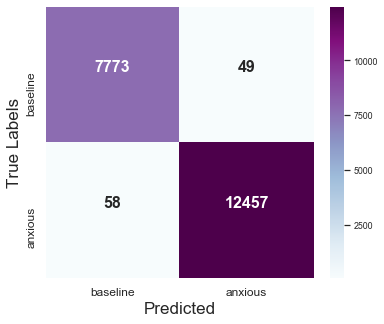

Accuracy is 99.47
------------------------------------------------------------------------------------------
Classifier: SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [297]:
#Experiment 1 - Radial SVM
split_train_test(experiment_number = 1, model = svm.SVC(kernel='rbf', C = 1000, gamma = 1))

Preparing pre-randomised data for experiment (1)...



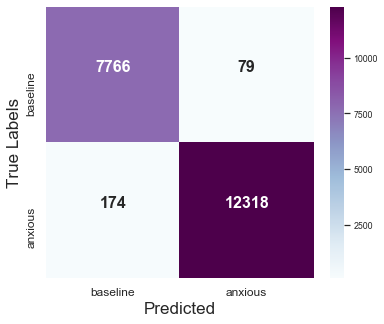

Accuracy is 98.76
------------------------------------------------------------------------------------------
Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')


In [15]:
#Experiment 1 - KNN
split_train_test(experiment_number = 1,model =  KNeighborsClassifier(n_neighbors=50), repeat = True)

Preparing pre-randomised data for experiment (1)...



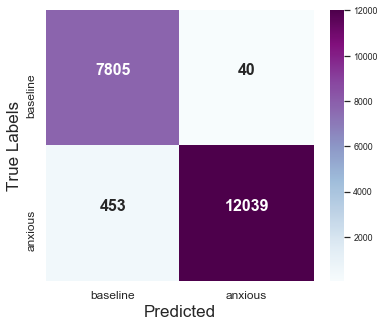

Accuracy is 97.58
------------------------------------------------------------------------------------------
Classifier: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [296]:
#Experiment 1 - Decision Tree
split_train_test(experiment_number = 1, model = DecisionTreeClassifier(criterion = 'gini', max_depth = 8), repeat=True )

Preparing pre-randomised data for experiment (1)...



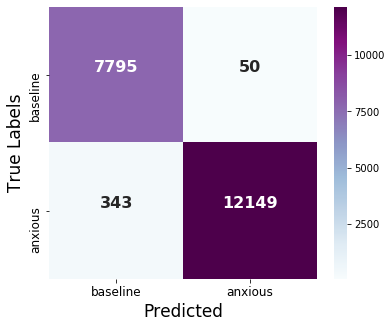

Accuracy is 98.07
------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [7]:
#Experiment 1 - Random Forest
split_train_test(experiment_number = 1, model = RandomForestClassifier(n_estimators = 400, min_samples_split = 2, min_samples_leaf= 1, max_depth = 8, bootstrap = False), repeat=True)

#### 5.2. Experiment (2)  
Classifying between the three states, baseline, anticipation social anxiety and reactive social anxiety.

Preparing pre-randomised for experiment (2)... 



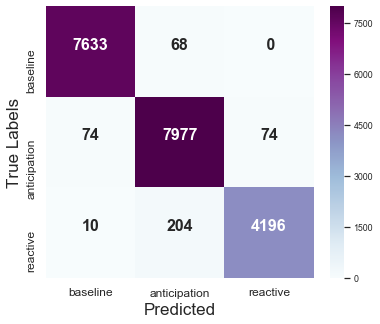

Accuracy is 97.88
------------------------------------------------------------------------------------------
Classifier: SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [303]:
#Experiment 2 - Radial SVM
split_train_test(experiment_number = 2, model = svm.SVC(kernel='rbf', C = 1000, gamma = 1), repeat = True)

Preparing pre-randomised for experiment (2)... 



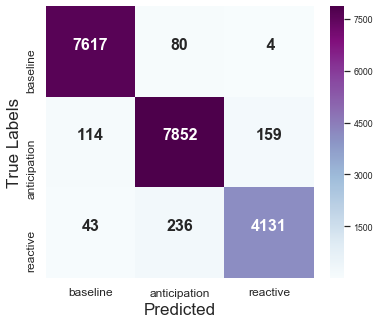

Accuracy is 96.86
------------------------------------------------------------------------------------------
Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')


In [302]:
#Experiment 2 - KNN
split_train_test(experiment_number = 2, model =  KNeighborsClassifier(n_neighbors=50), repeat = True)

Preparing pre-randomised for experiment (2)... 



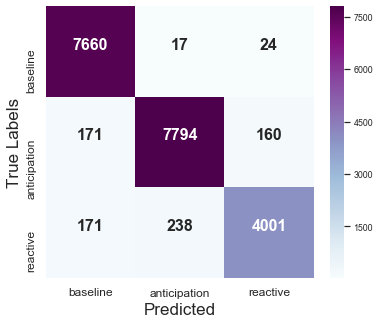

Accuracy is 96.14
------------------------------------------------------------------------------------------
Classifier: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [300]:
#Experiment 2 - Decision Tree
split_train_test(experiment_number = 2, model = DecisionTreeClassifier(criterion = 'gini', max_depth = 8), repeat = True )

Preparing pre-randomised for experiment (2)... 



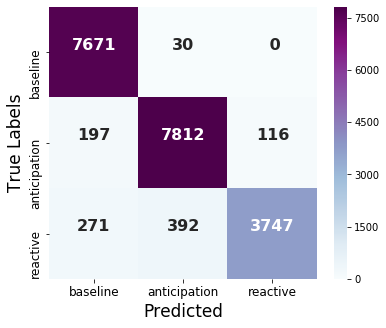

Accuracy is 95.03
------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [8]:
#Experiment 2 - Random Forest
split_train_test(experiment_number = 2, model = RandomForestClassifier( n_estimators = 400, min_samples_split = 2, min_samples_leaf= 1, max_depth = 8, bootstrap = False), repeat = True)

#### 5.3. Experiment (3)  
Classifying between marked and moderate social anxiety.

Preparing pre-randomised data for experiment (3)...



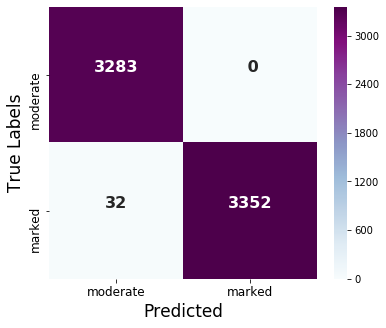

Accuracy is 99.52
------------------------------------------------------------------------------------------
Classifier: SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [52]:
#Experiment 3 - Radial SVM
split_train_test(experiment_number = 3, model = svm.SVC(kernel='rbf', C = 1000, gamma = 1), repeat = True)

Preparing pre-randomised data for experiment (3)...



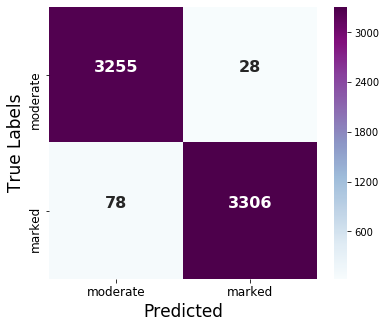

Accuracy is 98.41
------------------------------------------------------------------------------------------
Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')


In [51]:
#Experiment 3 - KNN
split_train_test(experiment_number = 3, model =  KNeighborsClassifier(n_neighbors=50), repeat = True)

Preparing pre-randomised data for experiment (3)...



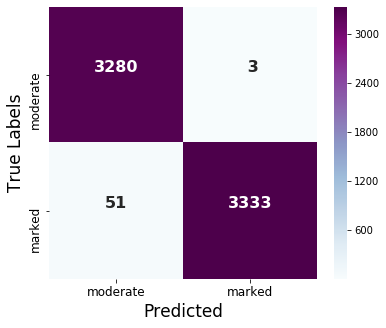

Accuracy is 99.19
------------------------------------------------------------------------------------------
Classifier: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [49]:
#Experiment 3 - Decision Tree
split_train_test(experiment_number = 3, model = DecisionTreeClassifier(criterion = 'gini', max_depth = 8), repeat = True)

Preparing pre-randomised data for experiment (3)...



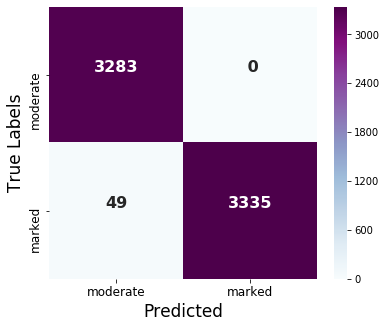

Accuracy is 99.27
------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [50]:
#Experiment 3 - Random Forest
split_train_test(experiment_number = 3, model = RandomForestClassifier( n_estimators = 400, min_samples_split = 2, min_samples_leaf= 1, max_depth = 8, bootstrap = False), repeat = True)

## 6. Further Evaluation Using Cross Validation

The accuracy of the models were more effectively estimated using 10-fold cross validation. K-fold cross validation a common method used to examine performance of a predictive model, it gives a better indication of the robustness of a model as well as an indication of how precise the estimate is based on the outputted standard deviation. The method involves dividing the dataset into k-folds with one-fold for testing whilst the other subsets are used in the training set. The procedure is repeated k times so that all subsets are used as a test set once, which is beneficial when datasets are limited. Following this, the mean cross validation accuracy and the standard deviation is outputted.

<img src="../images/GithubKFold.png" width="460"/>

The following __cross_validation__ function retreives the data for the given experiment and randomises the dataset (however if the _repeat = True_ then a pre-randomised dataset will be retrieved). Then the data is split into k-folds, with one fold as the test data and k-1 folds as training data. Following this, the training data is standardised using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), the same transform is then applied to the test data. This procedure is repeated k times. The function then outputs the mean cross validation accuracy and the standard deviation.


#### Parameters for cross_validation function
---
__experiment_number__  _int, {1,2,3}, default=None_ <br/>
The _experiment_number_ determines which ML experiment you are training models for. More details about each experiment can be found in the introduction. It is not an optional parameter.

__folds__  _int, default=5_ <br/>
The _folds_ is an integer that determines k in k-fold cross validation, therefore determines the number of folds. It's default value is 5.

__model__  _default=None_ <br/>
The _model_ should be assigned to a classifier/estimator to be used e.g. _model = LogisticRegression()_. It is not an optional parameter.

__repeat__  _boolean, default=False, optional_ <br/>
When _repeat_ is set to _True_ then the function will retrieve the pre-randomised dataset for the chosen experiment, in order to reproduce the results within the report. When _repeat_ is set to _False_ the function will actively randomise a dataset combined earlier. Please note that the Random Forest results may not reproduce the exact same results due to it's randomness [(Muller and Guido)](https://www.amazon.co.uk/Introduction-Machine-Learning-Python-Sarah/dp/1449369413). It is an optional parameter.

__confused_matrix__  _str,{'general', 'normalised'}, default='', optional_ <br/>
When _confused_matrix_ is set to _'general'_ then the function will output a confusion matrix per fold, in order to indicate how well the model has classified information. If _confused_matrix_ is set to _'normalised'_ then a normalised confusion matrix will be returned. It is an optional parameter.

In [3]:
def cross_validation(experiment_number=None, folds=5, model=None, repeat=False, confused_matrix=''):
    
    """
    Function: cross_validation    
    --------------------------

    Summary
    -------

    The following function performs k-fold cross validation and outputs the 
    mean cross validation accuracies and standard deviation of accuracies.
    The function can also output a confusion matrix per fold.
    
    Procedure
    ---------
    
    The function first retrieves pre-randomised data or actively randomises dataset. 
    The randomised data is then split into k-folds with one fold for testing and k-1 folds for training.
    Both the train and test data are scaled using StandardScaler during each fold.
    A model is then trained using inputted classifier and train dataset.
    The trained model is then evaluated using the test data.
    This procedure is repeated k times.
    The function then outputs the mean cross validation accuracy and the standard deviation.
    A confusion matrix per fold may also be outputted.
    
    """
    
    start = 0
    accuracy=[]
    num_cols = ['0','1','2']
    
    #Output error messages to improve interaction 
    if experiment_number == None or experiment_number < 1 or experiment_number > 3:
        print('Error: please input experiment number between 1 and 3 e.g. experiment_number = 1')
        return
    if folds <  2:
        print('Error: please input more than folds > 1. If you would like to split 67% train and 33% test use function "split_train_test"')
        return
    if model == None:
        print('Error: please input a valid model e.g. model = KNeighborsClassifier()')
        return
    
    #If repeat is True, a previously randomised dataset will be used
    if repeat == True:
        #reading the correct combined preprocessed data
        if experiment_number == 1:
            df = pd.read_csv("experiment_1_randomised_data.csv")
            print('Preparing pre-randomised data for experiment (1)...\n')
        elif experiment_number == 2:
            df = pd.read_csv("experiment_2_randomised_data.csv")
            print('Preparing pre-randomised for experiment (2)... \n')
        else: 
            experiment_number == 3
            df = pd.read_csv("experiment_3_randomised_data.csv")
            print('Preparing pre-randomised data for experiment (3)...\n')

    #If repeat is False, the data will be randomised
    else:
        #reading the correct combined data
        if experiment_number == 1:
            file = pd.read_csv("master_experiment_1.csv")
            print('Preparing data for experiment (1)...\n')
        elif experiment_number == 2:
            file = pd.read_csv("master_experiment_2.csv")
            print('Preparing data for experiment (2)... \n')
        else: 
            experiment_number == 3
            file = pd.read_csv("master_experiment_3.csv")
            print('Preparing data for experiment (3)...\n')

        #shuffling data randomly
        idx = np.random.permutation(file.index)
        df = file.reindex(idx, axis=0)
        df = df.drop('Unnamed: 0', axis =1)
        df = df.reset_index(drop=True)
        df.to_csv("randomised_data.csv")
        df = pd.read_csv("randomised_data.csv")
    
    df = df.drop('Unnamed: 0', axis =1)
    
    for i in range(1,folds + 1):
        
        #splitting into test and train based on k-folds
        counter = int(len(df)/folds)
        duration = start + counter
        
        trainset = df.drop(df.index[start:duration])
        trainset = trainset.reset_index(drop=True)
        
        testset = df[start:duration]
        testset = testset.reset_index(drop=True)
        
        start = start + counter
        
        #standardising data columns
        for z in num_cols:

            # fit on training data column
            scale = preprocessing.StandardScaler().fit(trainset[[z]])
            # transform the training data column
            trainset[z] = scale.transform(trainset[[z]])
            # transform the test data column
            testset[z] = scale.transform(testset[[z]])

        train_X = trainset[trainset.columns[0:3]]
        train_Y = trainset[trainset.columns[3]]
        test_X = testset[testset.columns[0:3]]
        test_Y = testset[testset.columns[3]]

        #identifying if multi-class or binary classification
        if experiment_number == 2:
            model_prepared = OneVsRestClassifier(model)
        else: 
            model_prepared = model
        
        modelfit = model_prepared.fit(train_X,train_Y)    
        prediction = modelfit.predict(test_X)    
        modelaccuracy = metrics.accuracy_score(prediction,test_Y)
        accuracy.append(modelaccuracy)
        
        #outputting confusion matrix per iteration if desired
        if confused_matrix != '':
            cm = metrics.confusion_matrix(test_Y, prediction)
            if confused_matrix == 'normalised':
                cm= (np.round(100*(cm / cm.astype(np.float).sum(axis=1)),2))
            print('Confusion matrix, for iteration', i)
            print(cm)
            print('-'*90)
    
    #output mean accuracy and standard deviation
    print('Mean score for %.f-fold cross validation'%folds, 'is %.2f' %round(Decimal(100*statistics.mean(accuracy)),2),'and standard deviation is %.3f' %round(Decimal(100*statistics.stdev(accuracy, xbar = statistics.mean(accuracy))),3))
    print('-'*90)
    print('Classifier:',model) 

#### 6.1. Experiment (1) 
Classifying between baseline and socially anxious states.

In [313]:
# 10-fold cross validation - Radial SVM
cross_validation(experiment_number = 1, folds = 10, model = svm.SVC(kernel='rbf', C = 1000, gamma = 1), repeat = True)

Preparing pre-randomised data for experiment (1)...

Mean score for 10-fold cross validation is 99.48 and standard deviation is 0.084
------------------------------------------------------------------------------------------
Classifier: SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [6]:
# 10-fold cross validation - k-Nearest Neighbour
cross_validation(experiment_number = 1, folds = 10, model = KNeighborsClassifier(n_neighbors=50), repeat = True)

Preparing pre-randomised data for experiment (1)...

Mean score for 10-fold cross validation is 99.08 and standard deviation is 0.105
------------------------------------------------------------------------------------------
Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')


In [20]:
# 10-fold cross validation - Decision Tree
cross_validation(experiment_number = 1, folds = 10, model = DecisionTreeClassifier(criterion = 'gini', max_depth = 8), repeat = True)

Preparing pre-randomised data for experiment (1)...

Mean score for 10-fold cross validation is 97.54 and standard deviation is 0.287
------------------------------------------------------------------------------------------
Classifier: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [32]:
# 10-fold cross validation - Random Forest
cross_validation(experiment_number = 1, folds = 10, model = RandomForestClassifier(n_estimators= 400, min_samples_split = 2, min_samples_leaf = 1, max_depth = 8, bootstrap = False), repeat = True)

Preparing pre-randomised data for experiment (1)...

Mean score for 10-fold cross validation is 97.95 and standard deviation is 0.324
------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


#### 6.2. Experiment (2)  
Classifying between the three states, baseline, anticipation social anxiety and reactive social anxiety.

In [319]:
# 10-fold cross validation - Radial SVM
cross_validation(experiment_number = 2, folds = 10, model = svm.SVC(kernel='rbf', C = 1000, gamma = 1), repeat = True)

Preparing pre-randomised for experiment (2)... 

Mean score for 10-fold cross validation is 98.10 and standard deviation is 0.134
------------------------------------------------------------------------------------------
Classifier: SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [320]:
# 10-fold cross validation - k-Nearest Neighbour
cross_validation(experiment_number = 2, folds = 10, model = KNeighborsClassifier(n_neighbors=50), repeat = True)

Preparing pre-randomised for experiment (2)... 

Mean score for 10-fold cross validation is 97.61 and standard deviation is 0.273
------------------------------------------------------------------------------------------
Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')


In [318]:
# 10-fold cross validation - Decision Tree
cross_validation(experiment_number = 2, folds = 10, model = DecisionTreeClassifier(criterion = 'gini', max_depth = 8), repeat = True)

Preparing pre-randomised for experiment (2)... 

Mean score for 10-fold cross validation is 96.63 and standard deviation is 0.373
------------------------------------------------------------------------------------------
Classifier: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [13]:
# 10-fold cross validation - Random Forest
cross_validation(experiment_number = 2, folds = 10, model = RandomForestClassifier(n_estimators= 400, min_samples_split = 2, min_samples_leaf = 1, max_depth = 8,  bootstrap = False), repeat = True)

Preparing pre-randomised for experiment (2)... 

Mean score for 10-fold cross validation is 95.21 and standard deviation is 0.398
------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


#### 6.3. Experiment (3)  
Classifying between marked and moderate social anxiety.

In [326]:
# 10-fold cross validation - Radial SVM
cross_validation(experiment_number = 3, folds = 10, model = svm.SVC(kernel='rbf', C = 1000, gamma = 1), repeat =True)

Preparing pre-randomised data for experiment (3)...

Mean score for 10-fold cross validation is 99.52 and standard deviation is 0.153
------------------------------------------------------------------------------------------
Classifier: SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [327]:
# 10-fold cross validation - k-Nearest Neighbour
cross_validation(experiment_number = 3, folds = 10, model = KNeighborsClassifier(n_neighbors=50), repeat = True)

Preparing pre-randomised data for experiment (3)...

Mean score for 10-fold cross validation is 98.86 and standard deviation is 0.275
------------------------------------------------------------------------------------------
Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')


In [325]:
# 10-fold cross validation - Decision Tree
cross_validation(experiment_number = 3, folds = 10, model = DecisionTreeClassifier(criterion = 'gini', max_depth = 8), repeat = True)

Preparing pre-randomised data for experiment (3)...

Mean score for 10-fold cross validation is 99.04 and standard deviation is 0.321
------------------------------------------------------------------------------------------
Classifier: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [14]:
# 10-fold cross validation - Random Forest
cross_validation(experiment_number = 3, folds = 10, model = RandomForestClassifier(n_estimators= 400, min_samples_split = 2, min_samples_leaf = 1, max_depth = 8, bootstrap = False), repeat = True)

Preparing pre-randomised data for experiment (3)...

Mean score for 10-fold cross validation is 99.34 and standard deviation is 0.144
------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## 7. Direct Comparison Between Models

Each of the cross validation accuracies from the various classification algorithms as well as the standard deviations were also directly compared. 

The following __compare_cv__ function retreives the data for the given experiment and randomises the dataset (however if the _repeat = True_ then a pre-randomised dataset will be retrieved). Then the data is split into 'k'-folds, with one fold as the test data and k-1 folds as training data. Following this the training data is standardised using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), the same transform is then applied to the test data. This procedure is repeated k times for each model in the _models_ list. The function then outputs the mean cross validation accuracy, time elapsed for each model and the standard deviation as well as a barchart or boxplots.

#### Parameters for compare_cv function
---
__experiment_number__  _int, {1,2,3}, default=None_ <br/>
The _experiment_number_ determines which ML experiment you are training models for. More details about each experiment can be found in the introduction. It is not an optional parameter.

__folds__  _int, default=5_ <br/>
The _folds_ is an integer that determines k in k-fold cross validation, therefore determines the number of folds. It's default value is 5.

__repeat__  _boolean, default=False, optional_ <br/>
When _repeat_ is set to _True_ then the function will retrieve the pre-randomised dataset for the chosen experiment, in order to reproduce the results within the report. When _repeat_ is set to _False_ the function will actively randomise a dataset combined earlier. It is an optional parameter.

__visual__  _str,{'barchart','boxplot'}, default='boxplot', optional_ <br/>
When _visual_ is set to _'barchart'_ then the function will output an barchart of the mean cross validation accuracies for each model. When _visual_ is set to _'boxplot'_ then a boxplot will be outputted indicating the cross validation accuracies for each model and standard deviation. It is an optional parameter.

In [4]:
def compare_cv(experiment_number=None, folds=5, repeat=False, visual = 'boxplot'):
    
    """
    Function: compare_cv
    --------------------
    
    Summary
    --------
    
    The following function performs k-fold cross validation and outputs the mean cross validation 
    accuracies and standard deviation of accuracies from models created from a selection of classifiers 
    (SVM, KNN, Decision Tree and Random Forest). The outputs include a dataframe of mean accuracies, standard 
    deviation, time elapsed and either a boxplot or barchart.
    
    Procedure
    ---------
    
    The function first retrieves pre-randomised data or actively randomises dataset. 
    The randomised data is then split into k-folds with one fold for testing and k-1 folds for training.
    Both the train and test data are scaled using StandardScaler.
    A model is then trained using inputted classifier and train dataset.
    The trained model is then evaluated using the test data.
    This procedure is repeated k times for each model in the 'models' list.
    The function then outputs the mean cross validation accuracy and the standard deviation for each model.
    A barchart or boxplot of the mean cross validation accuracies for each model may also be outputted.
    
    """
    
    cv_result = []
    std = []
    timed = []
    num_cols = ['0','1','2']
    akws = {'va': 'bottom','size': '12', 'color' : 'r'}
    accuracylist =[[],[],[],[]]
    iteration = 0
    
    #Classifiers explored
    classifiers=['SVM','KNN','Decision Tree','Random Forest']
    models=[svm.SVC(kernel='rbf', C = 1000, gamma = 1),KNeighborsClassifier(n_neighbors=50),DecisionTreeClassifier(criterion = 'gini', max_depth = 8),RandomForestClassifier(n_estimators= 400, min_samples_split = 2, min_samples_leaf = 1, max_depth = 8, bootstrap = False)]
    
    #Output error messages to improve interaction 
    if experiment_number == None or experiment_number < 1 or experiment_number > 3:
        print('Error: please input experiment number between 1 and 3 e.g. experiment_number = 1')
        return
    if folds <  2:
        print('Error: please input more than folds > 1. If you would like to split 67% train and 33% test use function "split_train_test"')
        return
    
    #If repeat is True, a previously randomised dataset will be used
    if repeat == True:
        #reading the correct combined preprocessed data
        if experiment_number == 1:
            df = pd.read_csv("experiment_1_randomised_data.csv")
            print('Preparing pre-randomised data for experiment (1)...\n')
        elif experiment_number == 2:
            df = pd.read_csv("experiment_2_randomised_data.csv")
            print('Preparing pre-randomised for experiment (2)... \n')
        else: 
            experiment_number == 3
            df = pd.read_csv("experiment_3_randomised_data.csv")
            print('Preparing pre-randomised data for experiment (3)...\n')

    #If repeat is False, the data will be randomised
    else:
        #reading the correct combined data
        if experiment_number == 1:
            file = pd.read_csv("master_experiment_1.csv")
            print('Preparing data for experiment (1)...\n')
        elif experiment_number == 2:
            file = pd.read_csv("master_experiment_2.csv")
            print('Preparing data for experiment (2)... \n')
        else: 
            experiment_number == 3
            file = pd.read_csv("master_experiment_3.csv")
            print('Preparing data for experiment (3)...\n')

        #shuffling data randomly
        idx = np.random.permutation(file.index)
        df = file.reindex(idx, axis=0)
        df = df.drop('Unnamed: 0', axis =1)
        df = df.reset_index(drop=True)
        df.to_csv("randomised_data.csv")

        #splitting into test and train
        df = pd.read_csv("randomised_data.csv")
    
    df = df.drop('Unnamed: 0', axis =1)
    
    #iterating through various models
    for y in models:
        model = y
        accuracy=[]
        start = 0
        iteration = iteration + 1
        
        #start timer
        t0 = time.time()
    
        for i in range(1,folds + 1):

            #splitting into test and train based on k-folds
            counter = int(len(df)/folds)
            duration = start + counter
            
            trainset = df.drop(df.index[start:duration])
            trainset = trainset.reset_index(drop=True)
            
            testset = df[start:duration]
            testset = testset.reset_index(drop=True)
            
            start = start + counter
            
            #standardising data columns
            for z in num_cols:

                # fit on training data column
                scale = preprocessing.StandardScaler().fit(trainset[[z]])
                # transform the training data column
                trainset[z] = scale.transform(trainset[[z]])
                # transform the test data column
                testset[z] = scale.transform(testset[[z]])

            train_X = trainset[trainset.columns[0:3]]
            train_Y = trainset[trainset.columns[3]]
            test_X = testset[testset.columns[0:3]]
            test_Y = testset[testset.columns[3]]
            
            #identifying if multi-class or binary classification
            if experiment_number == 2:
                model_prepared = OneVsRestClassifier(model)
            else: 
                model_prepared = model

            #fitting model    
            modelfit = model_prepared.fit(train_X,train_Y)
            prediction = modelfit.predict(test_X)
            modelaccuracy = metrics.accuracy_score(prediction,test_Y)
            accuracy.append(modelaccuracy)
            accuracylist[iteration-1].append(100*modelaccuracy)
        
        #store accuracies and standard deviation
        accuracy_result = 100*statistics.mean(accuracy)
        cv_result.append(accuracy_result)
        std.append(100*statistics.stdev(accuracy, xbar = statistics.mean(accuracy)))

        #end timer and store elapsed time
        elapsedtime = time.time() - t0
        timed.append(round(elapsedtime))
    
    #outputting mean cross validation accuracies and standard deviations
    new_models_dataframe2=pd.DataFrame({'Mean Cross Validation Accuracy':cv_result,'Standard Deviation':std,'Time Elapsed (sec)': timed},index=classifiers)
    plt.rcParams['axes.facecolor'] = 'ghostwhite'
    #outputting boxplot or barchart of results
    if visual == 'boxplot':
        plt.subplots(figsize=(12,6))
        box=pd.DataFrame(accuracylist, index=[classifiers])
        plt.ylabel('Accuracy(%)')
        box.T.boxplot()
    else:
        new_models_dataframe2['Mean Cross Validation Accuracy'].plot.barh( color = 'indigo', xerr=std, capsize = 12)
        plt.xlabel('Accuracy(%)')
        fig=plt.gcf()
        fig.set_size_inches(12,4)
    
    plt.title('Mean Cross Validation Accuracies')
    plt.show()
    
    return new_models_dataframe2     

#### 7.1. Experiment (1)  
Classifying between baseline and socially anxious states.

Preparing pre-randomised data for experiment (1)...



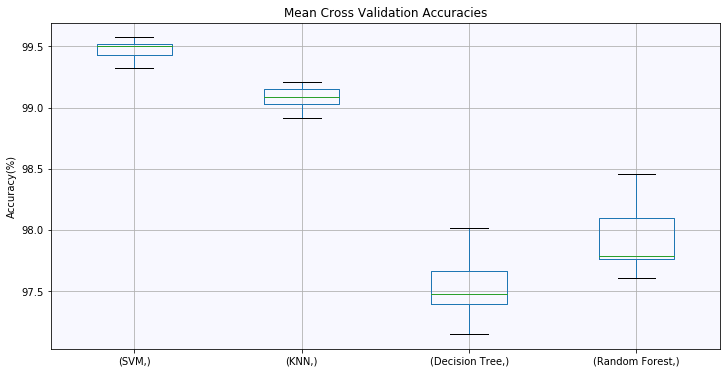

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 99.475496            0.083933   
KNN                                 99.078840            0.105037   
Decision Tree                       97.536469            0.288284   
Random Forest                       97.910179            0.263189   

               Time Elapsed (sec)  
SVM                           116  
KNN                             3  
Decision Tree                   1  
Random Forest                 183

In [3]:
#Compare models created for experiment 1, using 10-folds
compare_cv(experiment_number= 1, folds = 10, repeat=True)

#### 7.2. Experiment (2)  
Classifying between the three states, baseline, anticipation social anxiety and reactive social anxiety.

Preparing pre-randomised for experiment (2)... 



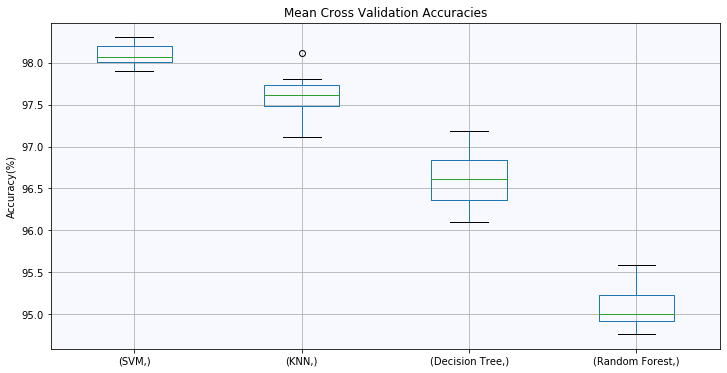

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 98.102454            0.133547   
KNN                                 97.609949            0.273478   
Decision Tree                       96.633174            0.373053   
Random Forest                       95.101301            0.287530   

               Time Elapsed (sec)  
SVM                           752  
KNN                             3  
Decision Tree                   3  
Random Forest                 558

In [4]:
#Compare models created for experiment 2, using 10-folds
compare_cv(experiment_number = 2, folds = 10, repeat=True)

#### 7.3. Experiment (3)  
Classifying between marked and moderate social anxiety.

Preparing pre-randomised data for experiment (3)...



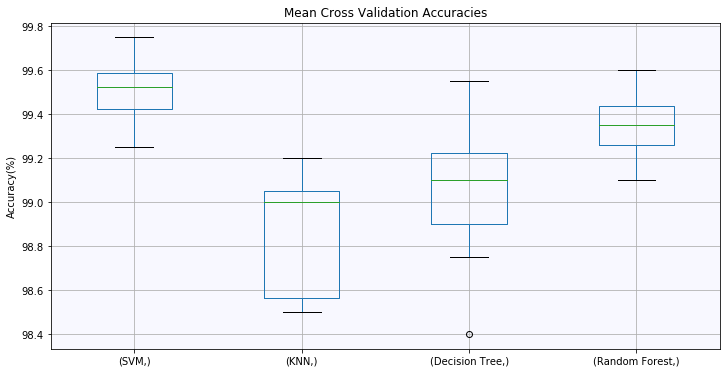

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                    99.515            0.152843   
KNN                                    98.860            0.274672   
Decision Tree                          99.040            0.321282   
Random Forest                          99.340            0.150555   

               Time Elapsed (sec)  
SVM                             8  
KNN                             1  
Decision Tree                   0  
Random Forest                  51

In [5]:
#Compare models created for experiment 3, using 10-folds
compare_cv(experiment_number = 3,folds = 10, repeat=True)

## 8.Exploring Feature Combinations

Different features and feature combinations were explored for each of the classification algorithms.

The following __feature_combination_cv__ function retreives the data for the given experiment and randomises the dataset (however if the _repeat = True_ then a pre-randomised dataset will be retrieved). From the datasets, the columns with the selected modality/modalities are extracted. Then the data is split into 'k'-folds, with one fold as the test data and k-1 folds as training data. Following this the training data is standardised using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), the same transform is then applied to the test data. This procedure is repeated k times for each model in the _models_ list. The function then outputs the mean cross validation accuracy, time elapsed for each model and the standard deviation as well as a barchart or boxplots.


#### Parameters for feature_combination_cv function
---
__experiment_number__  _int, {1,2,3}, default=None_ <br/>
The _experiment_number_ determines which ML experiment you are training models for. More details about each experiment can be found in the introduction. It is not an optional parameter.

__folds__  _int, default=5_ <br/>
The _folds_ is an integer that determines k in k-fold cross validation, therefore determines the number of folds. It's default value is 5.

__modality__ _str, {'HR','ST,'EDA'}, default = None_ <br/>
The _modality_ determines the modality/feature that you are investigating, the choice of modalities include HR, ST and EDA. It is not an optional parameter.

__modality_2__ _str, {'HR','ST,'EDA'}, default = None, optional_ <br/>
The _modality_2_ determines the second modality/feature that you are investigating therefore the function would investigation the combination of _modality_ and _modality_2_.The choice of modalities include HR, ST and EDA, however _modality_2_ must not equal _modality_.It is an optional parameter.

__repeat__  _boolean, default=False, optional_ <br/>
When _repeat_ is set to _True_ then the function will retrieve the pre-randomised dataset for the chosen experiment, in order to reproduce the results within the report. When _repeat_ is set to _False_ the function will actively randomise a dataset combined earlier. Please note that the Random Forest results may not reproduce the exact same results due to it's randomness [(Muller and Guido)](https://www.amazon.co.uk/Introduction-Machine-Learning-Python-Sarah/dp/1449369413). It is an optional parameter.

__visual__  _str,{'barchart','boxplot'}, default='barchart', optional_ <br/>
When _visual_ is set to _'barchart'_ then the function will output an barchart of the mean cross validation accuracies for each model. When _visual_ is set to _'boxplot'_ then a boxplot will be outputted indicating the cross validation accuracies for each model and standard deviation. It is an optional parameter.

In [5]:
def feature_combination_cv(experiment_number = None, folds = 5, modality = None, modality_2 = None, repeat=False, visual = 'barchart'):
    
    """
    Function: feature_combination_cv
    --------------------------------
    
    Summary
    --------
    
    The following function allows different modalities and modality combinations to be explored.
    After extracting the specified modalities, k-fold cross validation is performed and the function
    outputs the mean cross validation accuracies and standard deviation of accuracies from models 
    created from a selection of classifiers (SVM, KNN, Decision Tree and Random Forest). The outputs 
    include a dataframe of mean accuracies, standard deviation, time elapsed and either a boxplot or barchart.
    
    Procedure
    ---------
    
    The function first retrieves pre-randomised data or actively randomises dataset. 
    From the datasets, the columns with the selected modality/modalities are extracted.
    The randomised data is then split into k-folds with one fold for testing and k-1 folds for training.
    Both the train and test data are scaled using StandardScaler.
    A model is then trained using inputted classifier and train dataset.
    The trained model is then evaluated using the test data.
    This procedure is repeated k times for each model in the 'models' list.
    The function then outputs the mean cross validation accuracy and the standard deviation for each model.
    A barchart or boxplot of the mean cross validation accuracies for each model may also be outputted.
    
    """
    
    cv_result = []
    std = []
    timed = []
    num_cols = ['0','1','2']
    akws = {'va': 'bottom','size': '12', 'color' : 'r'}
    accuracylist =[[],[],[],[]]
    iteration = 0
    
    #Classifiers explored
    classifiers=['SVM','KNN','Decision Tree','Random Forest']
    models=[svm.SVC(kernel='rbf', C = 1000, gamma = 1),KNeighborsClassifier(n_neighbors=50),DecisionTreeClassifier(criterion = 'gini', max_depth = 8),RandomForestClassifier(n_estimators= 400, min_samples_split = 2, min_samples_leaf = 1, max_depth = 8, bootstrap = False)]

    #Output error messages to improve interaction 
    if experiment_number == None or experiment_number < 1 or experiment_number > 3:
        print('Error: please input experiment number between 1 and 3')
        return
    if folds <  2:
        print('Error: please input more than folds > 1. If you would like to split 67% train and 33% test use function "split_train_test"')
        return
    if modality == modality_2:
        print('Error: please input different modalities')
        return
    
    #setting the modality/modalities to be investigated
    if modality == 'HR':
        modality1 = '0'
    elif modality == 'ST':
        modality1 = '1'
    elif modality == 'EDA': 
        modality1 = '2'
    else:
        print('Error: the modality you inputted is not recognised')
        return
    
    if modality_2 != None:
        if modality_2 == 'HR':
            modality2 = '0'
        elif modality_2 == 'ST':
            modality2 = '1'
        elif modality_2 == 'EDA': 
            modality2 = '2'
        else:
            print('Error: the second modality you inputted is not recognised')
            return
    
    if modality_2 == None:
        modality_index = [modality1]
    else:
        modality_index = [modality1, modality2]
    
    #If repeat is True, a previously randomised dataset will be used
    if repeat == True:
        #reading the correct combined preprocessed data
        if experiment_number == 1:
            df = pd.read_csv("experiment_1_randomised_data.csv")
            print('Preparing pre-randomised data for experiment (1)...\n')
        elif experiment_number == 2:
            df = pd.read_csv("experiment_2_randomised_data.csv")
            print('Preparing pre-randomised for experiment (2)... \n')
        else: 
            experiment_number == 3
            df = pd.read_csv("experiment_3_randomised_data.csv")
            print('Preparing pre-randomised data for experiment (3)...\n')

    #If repeat is False, the data will be randomised
    else:
        #reading the correct combined data
        if experiment_number == 1:
            file = pd.read_csv("master_experiment_1.csv")
            print('Preparing data for experiment (1)...\n')
        elif experiment_number == 2:
            file = pd.read_csv("master_experiment_2.csv")
            print('Preparing data for experiment (2)... \n')
        else: 
            experiment_number == 3
            file = pd.read_csv("master_experiment_3.csv")
            print('Preparing data for experiment (3)...\n')

        #shuffling data randomly
        idx = np.random.permutation(file.index)
        df = file.reindex(idx, axis=0)
        df = df.drop('Unnamed: 0', axis =1)
        df = df.reset_index(drop=True)
        df.to_csv("randomised_data.csv")

        #splitting into test and train
        df = pd.read_csv("randomised_data.csv")
    
    df = df.drop('Unnamed: 0', axis =1)
    
    #iterating through various models
    for y in models:
        model = y
        accuracy=[]
        start = 0
        iteration = iteration + 1
        
        #start timer
        t0 = time.time()

        for i in range(1,folds + 1):
            
            #splitting into test and train based on k-folds
            counter = int(len(df)/folds)
            duration = start + counter
            
            #only include modality/modalities column and target column
            if modality_2 != None :
                df = df.loc[:, [modality1, modality2, '3']] 
            else:
                df = df.loc[:, [modality1, '3']] 
                
            trainset = df.drop(df.index[start:duration])
            trainset = trainset.reset_index(drop=True)
            
            testset = df[start:duration]
            testset = testset.reset_index(drop=True)
            
            start = start + counter
            
            #standardising data columns
            for z in modality_index :

                # fit on training data column
                scale = preprocessing.StandardScaler().fit(trainset[[z]])
                # transform the training data column
                trainset[z] = scale.transform(trainset[[z]])
                # transform the test data column
                testset[z] = scale.transform(testset[[z]])
                
            train_X = trainset[trainset.columns[0:len(modality_index)]]
            train_Y = trainset[trainset.columns[len(modality_index)]]
            test_X = testset[testset.columns[0:len(modality_index)]]
            test_Y = testset[testset.columns[len(modality_index)]]
            
            #identifying if multi-class or binary classification
            if experiment_number == 2:
                model_prepared = OneVsRestClassifier(model)
            else: 
                model_prepared = model

            #fitting model    
            modelfit = model_prepared.fit(train_X,train_Y)
            prediction = modelfit.predict(test_X)
            modelaccuracy = metrics.accuracy_score(prediction,test_Y)
            accuracy.append(modelaccuracy)
            accuracylist[iteration-1].append(100*modelaccuracy)
        
        #store accuracies and standard deviation
        accuracy_result = 100*statistics.mean(accuracy)
        cv_result.append(accuracy_result)
        std.append(100*statistics.stdev(accuracy, xbar = statistics.mean(accuracy)))
        
        #end timer and storing elapsed time
        elapsedtime = time.time() - t0
        timed.append(round(elapsedtime))
    
    #outputting mean cross validation accuracies and standard deviations
    new_models_dataframe2=pd.DataFrame({'Mean Cross Validation Accuracy':cv_result,'Standard Deviation':std,'Time Elapsed (sec)': timed},index=classifiers)
    
    #outputting boxplot or barchart of results
    plt.rcParams['axes.facecolor'] = 'ghostwhite'
    if visual == 'boxplot':
        plt.subplots(figsize=(12,6))
        plt.ylabel('Accuracy(%)')
        box=pd.DataFrame(accuracylist, index=[classifiers])
        box.T.boxplot()
    else:
        new_models_dataframe2['Mean Cross Validation Accuracy'].plot.barh( color = 'indigo', xerr=std, capsize = 12)
        plt.xlabel('Accuracy(%)')
        fig=plt.gcf()
        fig.set_size_inches(12,4)
        
   #outputting appropriate plot title
    if modality_2 != None:
        plt.title('Mean Cross Validation Accuracies with ' + modality + ' & '+ modality_2)
    else:
        plt.title('Mean Cross Validation Accuracies with Singular Modality ' + modality )    
    plt.show()
    
    return new_models_dataframe2     

#### 8.1. Experiment (1)  
Classifying between baseline and socially anxious states, using different modality combinations.

Preparing pre-randomised data for experiment (1)...



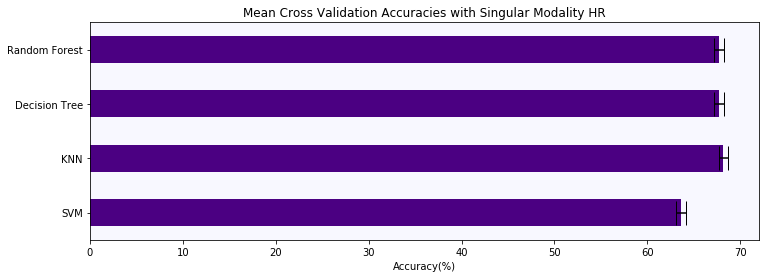

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 63.637109            0.568173   
KNN                                 68.183904            0.443894   
Decision Tree                       67.720046            0.496628   
Random Forest                       67.720046            0.496628   

               Time Elapsed (sec)  
SVM                          9636  
KNN                             3  
Decision Tree                   1  
Random Forest                 269

In [7]:
#Experiment 1 - HR
feature_combination_cv(experiment_number = 1, folds = 10, modality = 'HR', repeat=True)

Preparing pre-randomised data for experiment (1)...



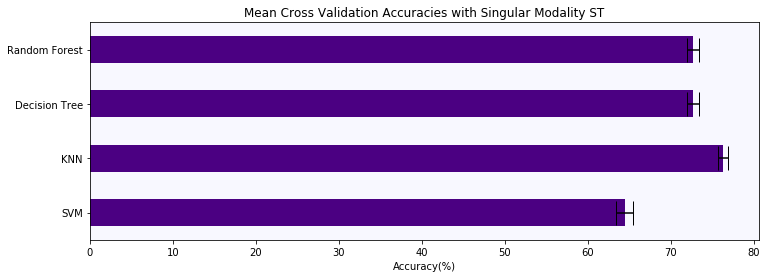

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 64.438617            0.986119   
KNN                                 76.300606            0.552576   
Decision Tree                       72.704475            0.724829   
Random Forest                       72.704475            0.724829   

               Time Elapsed (sec)  
SVM                          2699  
KNN                             2  
Decision Tree                   1  
Random Forest                 215

In [8]:
#Experiment 1 - ST
feature_combination_cv(experiment_number = 1, folds = 10, modality = 'ST', repeat=True)

Preparing pre-randomised data for experiment (1)...



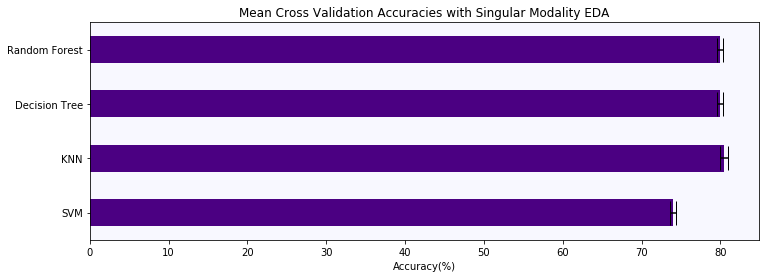

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 74.022291            0.398838   
KNN                                 80.458941            0.447801   
Decision Tree                       79.947550            0.323802   
Random Forest                       79.947550            0.323802   

               Time Elapsed (sec)  
SVM                          2122  
KNN                             3  
Decision Tree                   1  
Random Forest                 279

In [9]:
#Experiment 1 - EDA
feature_combination_cv(experiment_number = 1, folds = 10, modality = 'EDA', repeat=True)

Preparing pre-randomised data for experiment (1)...



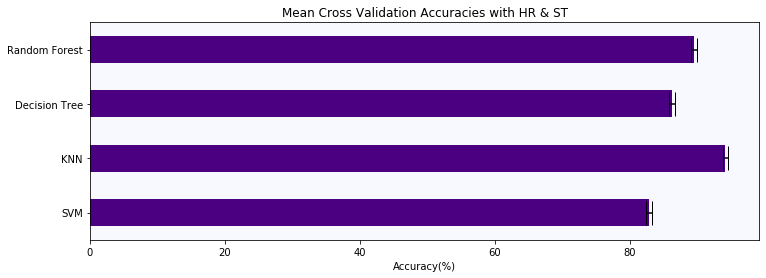

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 82.842157            0.466604   
KNN                                 94.161613            0.329704   
Decision Tree                       86.310441            0.457886   
Random Forest                       89.562367            0.423334   

               Time Elapsed (sec)  
SVM                          2253  
KNN                             3  
Decision Tree                   1  
Random Forest                 222

In [10]:
#Experiment 1 - HR & ST
feature_combination_cv(experiment_number = 1, folds = 10, modality = 'HR', modality_2 = 'ST', repeat=True)

Preparing pre-randomised data for experiment (1)...



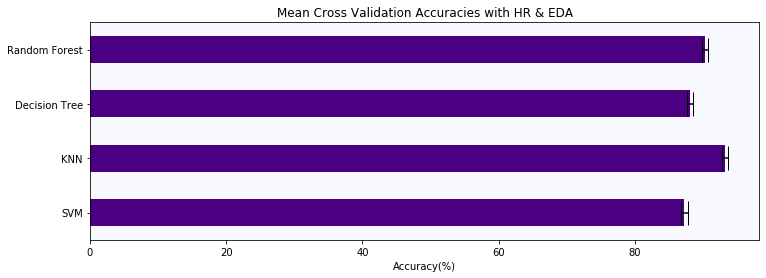

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 87.262744            0.511623   
KNN                                 93.145386            0.433989   
Decision Tree                       88.131454            0.428984   
Random Forest                       90.262252            0.466198   

               Time Elapsed (sec)  
SVM                          2098  
KNN                             3  
Decision Tree                   1  
Random Forest                 218

In [11]:
#Experiment 1 - HR & EDA
feature_combination_cv(experiment_number = 1, folds = 10, modality = 'HR', modality_2 = 'EDA', repeat=True)

Preparing pre-randomised data for experiment (1)...



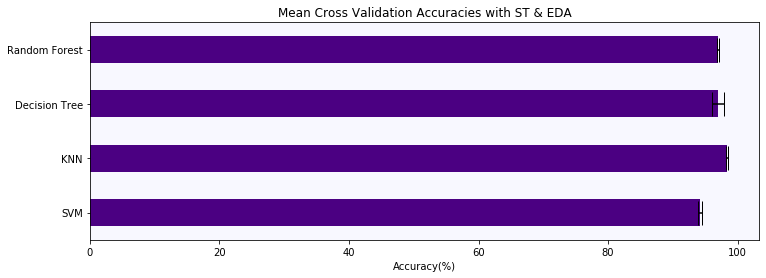

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 94.222259            0.318883   
KNN                                 98.318308            0.125353   
Decision Tree                       96.990657            0.887230   
Random Forest                       96.970988            0.220014   

               Time Elapsed (sec)  
SVM                           474  
KNN                             3  
Decision Tree                   1  
Random Forest                 176

In [12]:
#Experiment 1 - ST & EDA
feature_combination_cv(experiment_number = 1, folds = 10, modality = 'ST', modality_2 = 'EDA', repeat=True)

#### 8.2. Experiment (2)  
Classifying between the three states, baseline, anticipation social anxiety and reactive social anxiety, using different modality combinations.

Preparing pre-randomised for experiment (2)... 



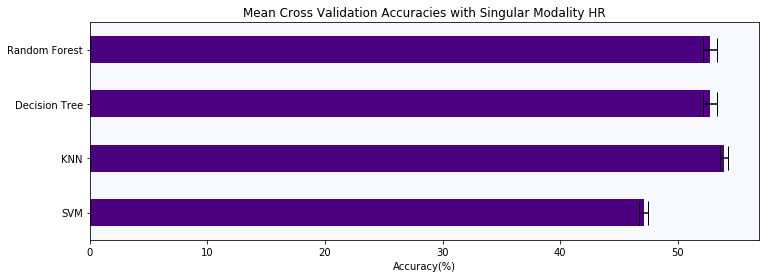

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 47.094383            0.375088   
KNN                                 53.910394            0.332028   
Decision Tree                       52.772196            0.580487   
Random Forest                       52.772196            0.580487   

               Time Elapsed (sec)  
SVM                         21317  
KNN                             3  
Decision Tree                   2  
Random Forest                 826

In [13]:
#Experiment 2 - HR
feature_combination_cv(experiment_number = 2, folds = 10, modality = 'HR', repeat=True)

Preparing pre-randomised for experiment (2)... 



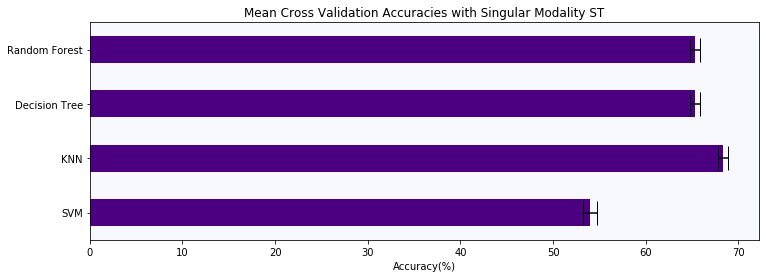

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 53.986164            0.746366   
KNN                                 68.319881            0.521059   
Decision Tree                       65.338494            0.573131   
Random Forest                       65.338494            0.573131   

               Time Elapsed (sec)  
SVM                          9805  
KNN                             3  
Decision Tree                   2  
Random Forest                 631

In [14]:
#Experiment 2 - ST
feature_combination_cv(experiment_number = 2, folds = 10, modality = 'ST', repeat=True)

Preparing pre-randomised for experiment (2)... 



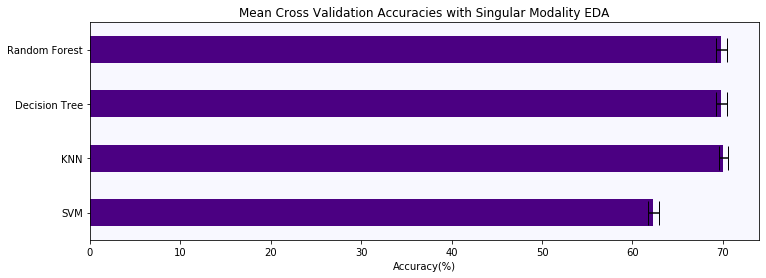

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 62.307692            0.598753   
KNN                                 70.018119            0.497848   
Decision Tree                       69.838577            0.634796   
Random Forest                       69.838577            0.634796   

               Time Elapsed (sec)  
SVM                          9149  
KNN                             3  
Decision Tree                   2  
Random Forest                 730

In [15]:
#Experiment 2 - EDA
feature_combination_cv(experiment_number = 2, folds = 10, modality = 'EDA', repeat=True)

Preparing pre-randomised for experiment (2)... 



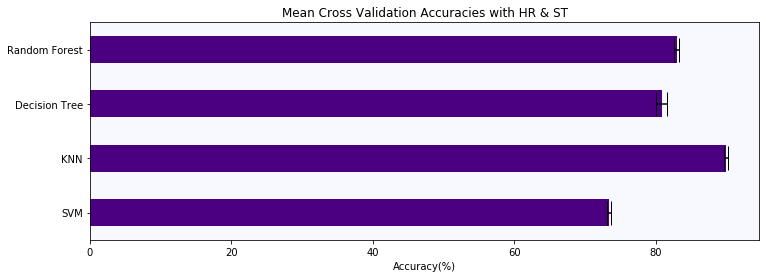

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 73.368473            0.287698   
KNN                                 89.836930            0.283071   
Decision Tree                       80.840059            0.783204   
Random Forest                       82.953385            0.359493   

               Time Elapsed (sec)  
SVM                          7472  
KNN                             3  
Decision Tree                   3  
Random Forest                 615

In [16]:
#Experiment 2 - HR & ST
feature_combination_cv(experiment_number = 2, folds = 10, modality = 'HR', modality_2 = 'ST', repeat=True)

Preparing pre-randomised for experiment (2)... 



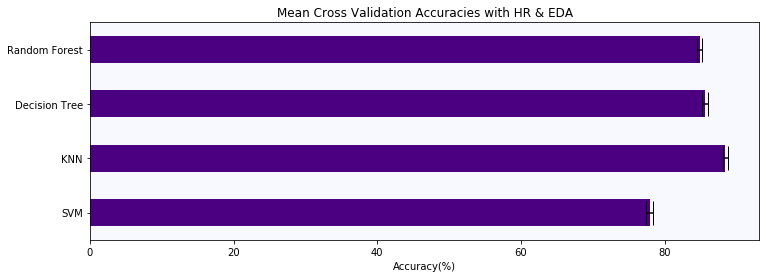

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 77.939384            0.487955   
KNN                                 88.397299            0.348659   
Decision Tree                       85.588865            0.399453   
Random Forest                       84.862461            0.374649   

               Time Elapsed (sec)  
SVM                          7726  
KNN                             3  
Decision Tree                   3  
Random Forest                 671

In [17]:
#Experiment 2 - HR & EDA
feature_combination_cv(experiment_number = 2, folds = 10, modality = 'HR', modality_2 = 'EDA', repeat=True)

Preparing pre-randomised for experiment (2)... 



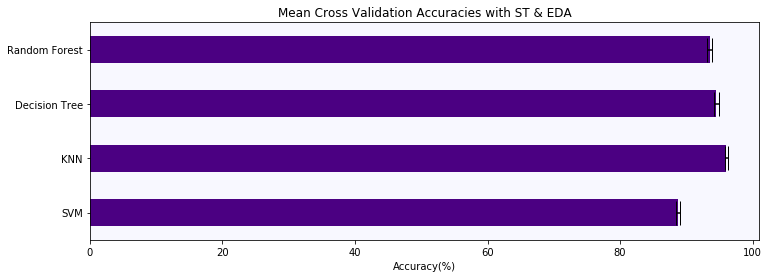

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                 88.759677            0.301252   
KNN                                 96.000659            0.213046   
Decision Tree                       94.524790            0.354659   
Random Forest                       93.511777            0.346425   

               Time Elapsed (sec)  
SVM                          2283  
KNN                             3  
Decision Tree                   2  
Random Forest                 545

In [18]:
#Experiment 2 - ST & EDA
feature_combination_cv(experiment_number = 2, folds = 10, modality = 'ST', modality_2 = 'EDA', repeat=True)

#### 8.3. Experiment (3)  
Classifying between marked and moderate social anxiety, using different modality combinations.

Preparing pre-randomised data for experiment (3)...



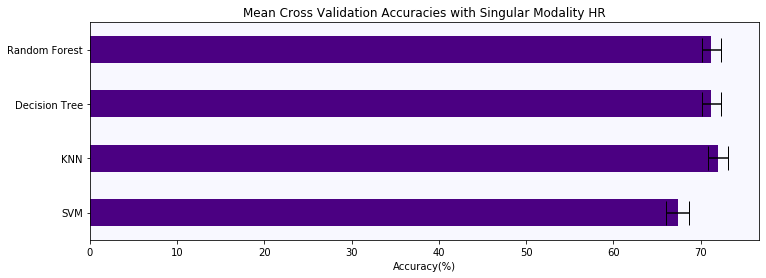

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                    67.365            1.268431   
KNN                                    72.000            1.097978   
Decision Tree                          71.250            1.114550   
Random Forest                          71.250            1.114550   

               Time Elapsed (sec)  
SVM                           230  
KNN                             1  
Decision Tree                   0  
Random Forest                  75

In [19]:
#Experiment 3 - HR
feature_combination_cv(experiment_number = 3, folds = 10, modality = 'HR', repeat=True)

Preparing pre-randomised data for experiment (3)...



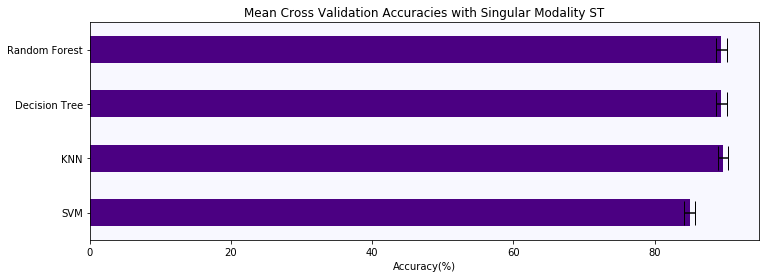

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                    84.980            0.802150   
KNN                                    89.635            0.701209   
Decision Tree                          89.470            0.767101   
Random Forest                          89.470            0.767101   

               Time Elapsed (sec)  
SVM                           121  
KNN                             1  
Decision Tree                   0  
Random Forest                  51

In [20]:
#Experiment 3 - ST
feature_combination_cv(experiment_number = 3, folds = 10, modality = 'ST', repeat=True)

Preparing pre-randomised data for experiment (3)...



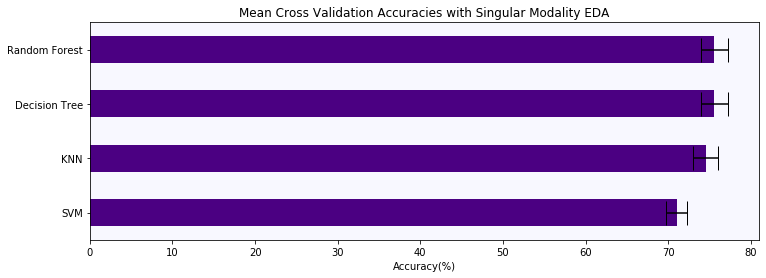

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                    71.030            1.252376   
KNN                                    74.535            1.511998   
Decision Tree                          75.565            1.619679   
Random Forest                          75.565            1.619679   

               Time Elapsed (sec)  
SVM                           474  
KNN                             1  
Decision Tree                   0  
Random Forest                  77

In [21]:
#Experiment 3 - EDA
feature_combination_cv(experiment_number = 3, folds = 10, modality = 'EDA', repeat=True)

Preparing pre-randomised data for experiment (3)...



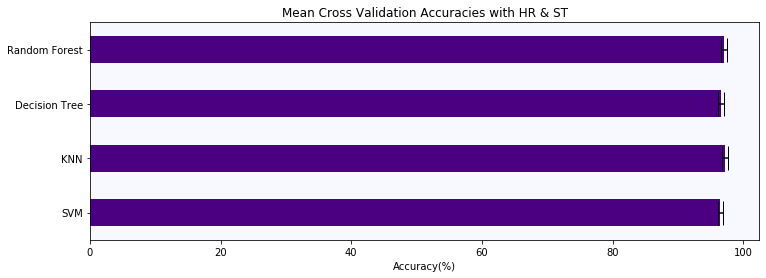

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                    96.490            0.352609   
KNN                                    97.140            0.437035   
Decision Tree                          96.630            0.460796   
Random Forest                          97.055            0.415966   

               Time Elapsed (sec)  
SVM                            66  
KNN                             1  
Decision Tree                   0  
Random Forest                  52

In [22]:
#Experiment 3 - HR & ST
feature_combination_cv(experiment_number = 3, folds = 10, modality = 'HR', modality_2 = 'ST', repeat=True)

Preparing pre-randomised data for experiment (3)...



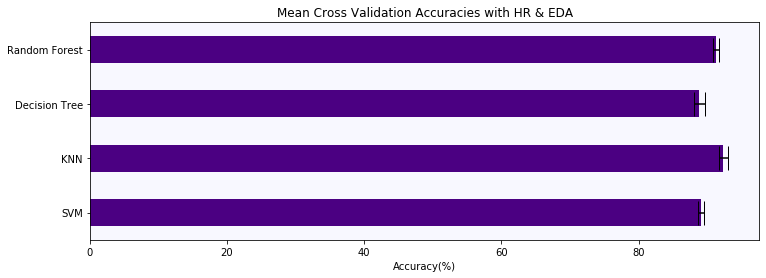

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                    89.130            0.435380   
KNN                                    92.365            0.607842   
Decision Tree                          88.855            0.771524   
Random Forest                          91.250            0.420317   

               Time Elapsed (sec)  
SVM                           158  
KNN                             1  
Decision Tree                   0  
Random Forest                  64

In [23]:
#Experiment 3 - HR & EDA
feature_combination_cv(experiment_number = 3, folds = 10, modality = 'HR', modality_2 = 'EDA', repeat=True)

Preparing pre-randomised data for experiment (3)...



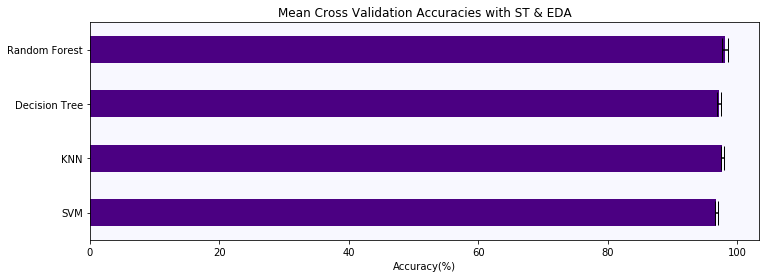

Mean Cross Validation Accuracy  Standard Deviation  \
SVM                                    96.835            0.205548   
KNN                                    97.745            0.284263   
Decision Tree                          97.225            0.239502   
Random Forest                          98.105            0.436813   

               Time Elapsed (sec)  
SVM                            33  
KNN                             1  
Decision Tree                   0  
Random Forest                  51

In [24]:
#Experiment 3 - ST & EDA
feature_combination_cv(experiment_number = 3, folds = 10, modality = 'ST', modality_2 = 'EDA', repeat=True)